In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Read in the files 

truthData = pd.read_csv( "output_nt_Truth.csv", comment="#", names=[ "EventID", "Phi", "Theta", "Momentum" ] )
tracker1Data = pd.read_csv( "output_nt_Tracker1.csv", comment="#", names=[ "EventID", "Phi", "Theta" ] )
tracker2Data = pd.read_csv( "output_nt_Tracker2.csv", comment="#", names=[ "EventID", "Phi", "Theta" ] )

# Part 1

In [3]:
# Initialise empty arrays
TrueParticles = []
Layer1Hits = []
Layer2Hits = []

# Loop over all 1000 events
for i in range(1000):
    TrueParticles.append(len(truthData.EventID[truthData.EventID == i])) # sums the number of entries corresponding to event i
    Layer1Hits.append(len(tracker1Data.EventID[tracker1Data.EventID == i]))# sums the number of entries corresponding to event i
    Layer2Hits.append(len(tracker2Data.EventID[tracker2Data.EventID == i]))# sums the number of entries corresponding to event i

# Loop over the events to print them
for j in range(1000):
    print("Number of true particles in event {:} = {:}".format(j,TrueParticles[j]))
    print("Number of layer 1 hits in event {:} = {:}".format(j,Layer1Hits[j]))
    print("Number of layer 2 hits in event {:} = {:}".format(j,Layer2Hits[j]))
    print("")
    
# These values appear correct as they match up to what I see when opening the .csv file in excel

Number of true particles in event 0 = 2
Number of layer 1 hits in event 0 = 0
Number of layer 2 hits in event 0 = 1

Number of true particles in event 1 = 2
Number of layer 1 hits in event 1 = 2
Number of layer 2 hits in event 1 = 7

Number of true particles in event 2 = 2
Number of layer 1 hits in event 2 = 2
Number of layer 2 hits in event 2 = 2

Number of true particles in event 3 = 2
Number of layer 1 hits in event 3 = 2
Number of layer 2 hits in event 3 = 6

Number of true particles in event 4 = 2
Number of layer 1 hits in event 4 = 34
Number of layer 2 hits in event 4 = 2

Number of true particles in event 5 = 2
Number of layer 1 hits in event 5 = 2
Number of layer 2 hits in event 5 = 2

Number of true particles in event 6 = 2
Number of layer 1 hits in event 6 = 20
Number of layer 2 hits in event 6 = 8

Number of true particles in event 7 = 2
Number of layer 1 hits in event 7 = 0
Number of layer 2 hits in event 7 = 0

Number of true particles in event 8 = 2
Number of layer 1 hits


Number of true particles in event 324 = 2
Number of layer 1 hits in event 324 = 0
Number of layer 2 hits in event 324 = 0

Number of true particles in event 325 = 2
Number of layer 1 hits in event 325 = 0
Number of layer 2 hits in event 325 = 0

Number of true particles in event 326 = 2
Number of layer 1 hits in event 326 = 2
Number of layer 2 hits in event 326 = 2

Number of true particles in event 327 = 2
Number of layer 1 hits in event 327 = 2
Number of layer 2 hits in event 327 = 14

Number of true particles in event 328 = 2
Number of layer 1 hits in event 328 = 0
Number of layer 2 hits in event 328 = 0

Number of true particles in event 329 = 2
Number of layer 1 hits in event 329 = 0
Number of layer 2 hits in event 329 = 1

Number of true particles in event 330 = 2
Number of layer 1 hits in event 330 = 2
Number of layer 2 hits in event 330 = 2

Number of true particles in event 331 = 2
Number of layer 1 hits in event 331 = 0
Number of layer 2 hits in event 331 = 0

Number of true

Number of layer 2 hits in event 589 = 2

Number of true particles in event 590 = 2
Number of layer 1 hits in event 590 = 2
Number of layer 2 hits in event 590 = 2

Number of true particles in event 591 = 2
Number of layer 1 hits in event 591 = 0
Number of layer 2 hits in event 591 = 0

Number of true particles in event 592 = 2
Number of layer 1 hits in event 592 = 2
Number of layer 2 hits in event 592 = 2

Number of true particles in event 593 = 2
Number of layer 1 hits in event 593 = 0
Number of layer 2 hits in event 593 = 0

Number of true particles in event 594 = 2
Number of layer 1 hits in event 594 = 2
Number of layer 2 hits in event 594 = 2

Number of true particles in event 595 = 2
Number of layer 1 hits in event 595 = 0
Number of layer 2 hits in event 595 = 0

Number of true particles in event 596 = 2
Number of layer 1 hits in event 596 = 0
Number of layer 2 hits in event 596 = 0

Number of true particles in event 597 = 2
Number of layer 1 hits in event 597 = 2
Number of layer 


Number of true particles in event 772 = 2
Number of layer 1 hits in event 772 = 0
Number of layer 2 hits in event 772 = 0

Number of true particles in event 773 = 2
Number of layer 1 hits in event 773 = 2
Number of layer 2 hits in event 773 = 17

Number of true particles in event 774 = 2
Number of layer 1 hits in event 774 = 2
Number of layer 2 hits in event 774 = 7

Number of true particles in event 775 = 2
Number of layer 1 hits in event 775 = 0
Number of layer 2 hits in event 775 = 0

Number of true particles in event 776 = 2
Number of layer 1 hits in event 776 = 0
Number of layer 2 hits in event 776 = 0

Number of true particles in event 777 = 2
Number of layer 1 hits in event 777 = 2
Number of layer 2 hits in event 777 = 2

Number of true particles in event 778 = 2
Number of layer 1 hits in event 778 = 2
Number of layer 2 hits in event 778 = 16

Number of true particles in event 779 = 2
Number of layer 1 hits in event 779 = 11
Number of layer 2 hits in event 779 = 2

Number of tr

# Part 2

In [4]:
no_of_pairs = [] # Initialise array

pair_values = [] # Makes a list of the pair values 


# Again, looping over the number of events
for i in range(1000):
    count = 0
    pair = []
    for j in np.array(tracker1Data.Theta[tracker1Data.EventID == i]): # Loop over values of theta in layer 1 corresponding to event i
        for k in np.array(tracker2Data.Theta[tracker2Data.EventID == i]): # Loop over values of theta in layer 2 corresponding to event i
            if math.fabs(j-k) < 0.0001: 
                count += 1 # Increase the count by 1 if a pair is found with theta close to each other
                pair.append([j,k]) # adds the pair values to the temporary list
    no_of_pairs.append(count) # Append the value to the list after looping over all layers
    pair_values.append(pair) # adds the pairs of event i to the main list of all events

for n in range(1000):
    print("Number of pairs in event {:} = {:}".format(n,no_of_pairs[n]))
    print("Pairs at theta values of: {:} ([layer1,layer2])".format(pair_values[n]))
    print("")
    
# There is quite a bit of double counting but that is due to the data. 
# E.g. for event 1 there are 4 hits with the same theta value (but slightly different phi values) 
# The code appears to work

Number of pairs in event 0 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 1 = 7
Pairs at theta values of: [[0.928358, 0.928325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21323], [2.21322, 2.21323]] ([layer1,layer2])

Number of pairs in event 2 = 2
Pairs at theta values of: [[2.21225, 2.21226], [0.92934, 0.929301]] ([layer1,layer2])

Number of pairs in event 3 = 6
Pairs at theta values of: [[2.18244, 2.18247], [0.959136, 0.959161], [0.959136, 0.959161], [0.959136, 0.959176], [0.959136, 0.95921], [0.959136, 0.959223]] ([layer1,layer2])

Number of pairs in event 4 = 4
Pairs at theta values of: [[2.04377, 2.04378], [1.09801, 1.09797], [1.09801, 1.09797], [1.09802, 1.09797]] ([layer1,layer2])

Number of pairs in event 5 = 2
Pairs at theta values of: [[1.99455, 1.99452], [1.14705, 1.14708]] ([layer1,layer2])

Number of pairs in event 6 = 11
Pairs at theta values of: [[1.62832, 1.62832], [1.62832, 1.62832], [1.62

Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 464 = 2
Pairs at theta values of: [[1.24583, 1.24582], [1.89577, 1.89578]] ([layer1,layer2])

Number of pairs in event 465 = 1
Pairs at theta values of: [[1.32653, 1.32649]] ([layer1,layer2])

Number of pairs in event 466 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 467 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 468 = 8
Pairs at theta values of: [[2.25851, 2.25854], [0.883091, 0.883089], [0.883091, 0.883089], [0.883091, 0.883103], [0.883091, 0.883116], [0.883091, 0.883116], [0.883091, 0.882992], [0.883091, 0.883115]] ([layer1,layer2])

Number of pairs in event 469 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 470 = 2
Pairs at theta values of: [[1.19672, 1.19671], [1.94915, 1.94914]] ([layer1,layer2])

Number of pairs in event 471 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 472 = 0
Pairs

Number of pairs in event 821 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 822 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 823 = 2
Pairs at theta values of: [[1.49661, 1.4966], [1.64775, 1.64775]] ([layer1,layer2])

Number of pairs in event 824 = 3
Pairs at theta values of: [[0.998894, 0.99889], [0.998894, 0.99889], [0.998853, 0.99889]] ([layer1,layer2])

Number of pairs in event 825 = 2
Pairs at theta values of: [[1.85108, 1.85111], [1.29051, 1.29047]] ([layer1,layer2])

Number of pairs in event 826 = 2
Pairs at theta values of: [[2.0714, 2.07143], [1.07014, 1.07006]] ([layer1,layer2])

Number of pairs in event 827 = 2
Pairs at theta values of: [[0.794462, 0.794391], [2.34713, 2.34716]] ([layer1,layer2])

Number of pairs in event 828 = 13
Pairs at theta values of: [[1.20366, 1.20365], [1.93794, 1.93799], [1.93794, 1.93799], [1.93794, 1.93799], [1.93794, 1.93799], [1.93795, 1.93799], [1.93796, 1.93799], [1.93798, 1.93799],

# Part 3

##### Note: technically, the code below also answers part 2, however it is almost unreadable so I replaced it with a cleaner version above. The only difference between this code here vs the one in the cell above is that rather than looping over the values themselves (in the loops j & k), I am looping over the indices of the values. This makes it look messier but is necessary to obtain both the $\theta$ and $\phi$ values. 

In [5]:
no_of_pairs = [] # Initialise array
pair_theta_values = [] # Makes a list of the theta pair values
pair_phi_values = [] # Makes a list of the phi pair values


# Again, looping over the number of events
for i in range(1000):
    count = 0
    pair_t = []
    pair_p = []
    for j in range(len(np.array(tracker1Data.Theta[tracker1Data.EventID == i]))): # Loop over index of theta in layer 1 corresponding to event i
        for k in range(len(np.array(tracker2Data.Theta[tracker2Data.EventID == i]))): # Loop over index of theta in layer 2 corresponding to event i
            if math.fabs(np.array(tracker1Data.Theta[tracker1Data.EventID == i])[j]-np.array(tracker2Data.Theta[tracker2Data.EventID == i])[k]) < 0.0001: 
                count += 1 # Increase the count by 1 if a pair is found with theta close to each other
                pair_t.append([np.array(tracker1Data.Theta[tracker1Data.EventID == i])[j],np.array(tracker2Data.Theta[tracker2Data.EventID == i])[k]]) # adds the pair values to the temporary list
                pair_p.append([np.array(tracker1Data.Phi[tracker1Data.EventID == i])[j],np.array(tracker2Data.Phi[tracker2Data.EventID == i])[k]])
    no_of_pairs.append(count) # Append the value to the list after looping over all layers
    pair_theta_values.append(pair_t) # adds the theta pairs of event i to the main list of all events
    pair_phi_values.append(pair_p) # adds the phi pairs of event i to the main list of all events

for n in range(1000):
    print("Number of pairs in event {:} = {:}".format(n,no_of_pairs[n]))
    print("Pairs at theta values of: {:} ([layer1,layer2])".format(pair_values[n]))
    print("")
    
# This code gives the same result as above so we know it works

Number of pairs in event 0 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 1 = 7
Pairs at theta values of: [[0.928358, 0.928325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21325], [2.21322, 2.21323], [2.21322, 2.21323]] ([layer1,layer2])

Number of pairs in event 2 = 2
Pairs at theta values of: [[2.21225, 2.21226], [0.92934, 0.929301]] ([layer1,layer2])

Number of pairs in event 3 = 6
Pairs at theta values of: [[2.18244, 2.18247], [0.959136, 0.959161], [0.959136, 0.959161], [0.959136, 0.959176], [0.959136, 0.95921], [0.959136, 0.959223]] ([layer1,layer2])

Number of pairs in event 4 = 4
Pairs at theta values of: [[2.04377, 2.04378], [1.09801, 1.09797], [1.09801, 1.09797], [1.09802, 1.09797]] ([layer1,layer2])

Number of pairs in event 5 = 2
Pairs at theta values of: [[1.99455, 1.99452], [1.14705, 1.14708]] ([layer1,layer2])

Number of pairs in event 6 = 11
Pairs at theta values of: [[1.62832, 1.62832], [1.62832, 1.62832], [1.62

Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 474 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 475 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 476 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 477 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 478 = 2
Pairs at theta values of: [[0.85455, 0.854554], [2.28704, 2.28708]] ([layer1,layer2])

Number of pairs in event 479 = 2
Pairs at theta values of: [[1.51151, 1.51152], [1.63008, 1.63007]] ([layer1,layer2])

Number of pairs in event 480 = 2
Pairs at theta values of: [[1.6504, 1.65039], [1.4912, 1.49118]] ([layer1,layer2])

Number of pairs in event 481 = 2
Pairs at theta values of: [[1.38632, 1.38634], [1.75527, 1.75527]] ([layer1,layer2])

Number of pairs in event 482 = 4
Pairs at theta values of: [[1.51471, 1.51474], [1.51471, 1.51474], [1.51471, 1.5147], [1.62688, 1.62691]] ([layer1,layer


Number of pairs in event 690 = 2
Pairs at theta values of: [[1.09298, 1.09296], [2.0486, 2.04861]] ([layer1,layer2])

Number of pairs in event 691 = 2
Pairs at theta values of: [[2.23349, 2.23351], [0.910145, 0.910133]] ([layer1,layer2])

Number of pairs in event 692 = 2
Pairs at theta values of: [[1.72658, 1.72659], [1.4151, 1.41509]] ([layer1,layer2])

Number of pairs in event 693 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 694 = 2
Pairs at theta values of: [[1.29311, 1.29311], [1.84848, 1.84846]] ([layer1,layer2])

Number of pairs in event 695 = 2
Pairs at theta values of: [[1.02592, 1.0259], [2.11572, 2.11573]] ([layer1,layer2])

Number of pairs in event 696 = 2
Pairs at theta values of: [[1.6559, 1.65599], [1.486, 1.48605]] ([layer1,layer2])

Number of pairs in event 697 = 0
Pairs at theta values of: [] ([layer1,layer2])

Number of pairs in event 698 = 2
Pairs at theta values of: [[1.21047, 1.21047], [1.93113, 1.93113]] ([layer1,layer2])

Number o

In [23]:
# Part 3

delta_phi = []
theta_average = []

# Loop over all events
for i in range(1000):
    if len(np.array(pair_phi_values[i])>0): # remove all events without pairs
        # append the value of delta phi
        delta_phi.append(abs(np.array(pair_phi_values[i])[:,0]-np.array(pair_phi_values[i])[:,1]))
        # Find the mean of the theta value pairs at each layer (they are similar enough that this is effectively selecting one)
        theta_average.append(np.mean(pair_theta_values[i],axis=1)) 
        
delta_phi = np.hstack(delta_phi) # Convert to 1 dimensional array
theta_average = np.hstack(theta_average) # Convert to 1 dimensional array

sagitta = np.sin(delta_phi)*4 # m

b_radius = (8.**2)/(8*sagitta) #R = L^2/8s #m

p_t = 0.3*0.5*b_radius #p_t = 0.3*B*R #GeV

p = p_t/np.sin(theta_average) # Calculate momentum in GeV

# Treating each pair as an individual particle
print("The values for the particle momenta are:\n")
for i in range(len(p)):
    print("Momentum for particle {:} = {:.4f} GeV".format(i,p[i]))

The values for the particle momenta are:

Momentum for particle 0 = 45.5298 GeV
Momentum for particle 1 = 45.7014 GeV
Momentum for particle 2 = 45.6958 GeV
Momentum for particle 3 = 45.8300 GeV
Momentum for particle 4 = 45.9255 GeV
Momentum for particle 5 = 45.9364 GeV
Momentum for particle 6 = 45.9082 GeV
Momentum for particle 7 = 45.4959 GeV
Momentum for particle 8 = 45.2218 GeV
Momentum for particle 9 = 45.4471 GeV
Momentum for particle 10 = 45.4637 GeV
Momentum for particle 11 = 45.4637 GeV
Momentum for particle 12 = 45.5765 GeV
Momentum for particle 13 = 45.7467 GeV
Momentum for particle 14 = 45.9184 GeV
Momentum for particle 15 = 45.4484 GeV
Momentum for particle 16 = 45.4751 GeV
Momentum for particle 17 = 45.4751 GeV
Momentum for particle 18 = 46.2870 GeV
Momentum for particle 19 = 45.2696 GeV
Momentum for particle 20 = 45.7095 GeV
Momentum for particle 21 = 45.7381 GeV
Momentum for particle 22 = 45.7381 GeV
Momentum for particle 23 = 45.4613 GeV
Momentum for particle 24 = 45.18

Momentum for particle 1341 = 45.5266 GeV
Momentum for particle 1342 = 45.8280 GeV
Momentum for particle 1343 = 45.4405 GeV
Momentum for particle 1344 = 45.0147 GeV
Momentum for particle 1345 = 45.4677 GeV
Momentum for particle 1346 = 45.4677 GeV
Momentum for particle 1347 = 45.4124 GeV
Momentum for particle 1348 = 45.3573 GeV
Momentum for particle 1349 = 45.3571 GeV
Momentum for particle 1350 = 45.3571 GeV
Momentum for particle 1351 = 45.6879 GeV
Momentum for particle 1352 = 45.4880 GeV
Momentum for particle 1353 = 45.4318 GeV
Momentum for particle 1354 = 45.4051 GeV
Momentum for particle 1355 = 45.4278 GeV
Momentum for particle 1356 = 45.4388 GeV
Momentum for particle 1357 = 45.6750 GeV
Momentum for particle 1358 = 45.6604 GeV
Momentum for particle 1359 = 45.6603 GeV
Momentum for particle 1360 = 18.5734 GeV
Momentum for particle 1361 = 18.5734 GeV
Momentum for particle 1362 = 18.4847 GeV
Momentum for particle 1363 = 18.4758 GeV
Momentum for particle 1364 = 42.8020 GeV
Momentum for par

Momentum for particle 2369 = 37.0661 GeV
Momentum for particle 2370 = 45.6991 GeV
Momentum for particle 2371 = 45.5186 GeV
Momentum for particle 2372 = 45.8622 GeV
Momentum for particle 2373 = 45.4647 GeV
Momentum for particle 2374 = 45.3694 GeV
Momentum for particle 2375 = 27.3464 GeV
Momentum for particle 2376 = 27.3600 GeV
Momentum for particle 2377 = 27.3948 GeV
Momentum for particle 2378 = 27.4277 GeV
Momentum for particle 2379 = 27.2433 GeV
Momentum for particle 2380 = 27.3446 GeV
Momentum for particle 2381 = 27.3118 GeV
Momentum for particle 2382 = 45.4559 GeV
Momentum for particle 2383 = 45.9048 GeV
Momentum for particle 2384 = 45.4143 GeV
Momentum for particle 2385 = 45.4205 GeV
Momentum for particle 2386 = 45.3999 GeV
Momentum for particle 2387 = 45.4342 GeV
Momentum for particle 2388 = 45.3657 GeV
Momentum for particle 2389 = 44.9185 GeV
Momentum for particle 2390 = 45.3589 GeV
Momentum for particle 2391 = 45.0126 GeV
Momentum for particle 2392 = 25.2803 GeV
Momentum for par

# Part 4

##### In this question, the existence of double counting has become an unignorable nuisance. Therefore, I will average over all the values corresponding to a similar theta to the true data and treat them as a single average particle. 

In [46]:
# Part 4

subtracted_momenta = []
accepted_momenta = []
counter = 0

for i in range(1000):
    theta1 = truthData.iloc[2*i,2]
    mom1 = truthData.iloc[2*i,3]
    theta2 = truthData.iloc[2*i+1,2]
    mom2 = truthData.iloc[2*i+1,3]
    if len(np.array(pair_phi_values[i])>0): # remove all events without pairs
        p1 = []
        p2 = []
        for j in np.mean(pair_theta_values[i],axis=1): # Loop over all theta pairs
            if math.fabs(j-theta1) < 0.001: # Finds the particle corresponding to true theta1 value
                p1.append(p[counter]) #appends the corresponding momentum
                counter += 1 #Ensures we keep up with the position of the momentum array
            elif math.fabs(j-theta2) < 0.001: # Finds the particle corresponding to true theta2 value
                p2.append(p[counter]) #appends the corresponding momentum
                counter += 1 #Ensures we keep up with the position of the momentum array
            else:
                counter += 1 # If not close to anything, the corresponded momentum will be ignored
        if len(p1)>0: # Ensures no errors are thrown in case of an empty list
            subtracted_momenta.append(np.mean(p1)-mom1) # Subtracts the calculated value from the true value
            accepted_momenta.append(mom1) # Ensures we subtract the correct true momenta
        if len(p2)>0: # Same as above but for particle 2 rather than particle 1
            subtracted_momenta.append(np.mean(p2)-mom2)
            accepted_momenta.append(mom2)                

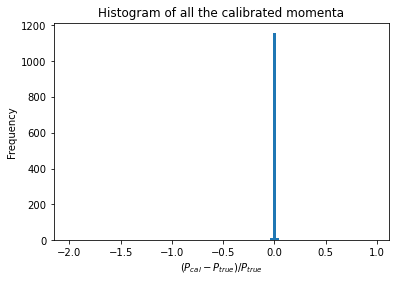

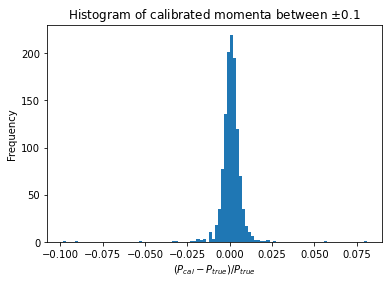

In [64]:
calibrated_p = np.asarray(subtracted_momenta)/np.asarray(accepted_momenta) # Find the calibration value

# Plotting the calibration values
plt.hist(calibrated_p,bins = 100)
plt.title("Histogram of all the calibrated momenta")
plt.xlabel("($P_{cal}-P_{true})/P_{true}$")
plt.ylabel("Frequency")
plt.show()
# Removing outliers to get a clearer picture
plt.hist(calibrated_p[(calibrated_p<0.1) & (calibrated_p>-0.1)],bins=100)
plt.title("Histogram of calibrated momenta between $\pm0.1$")
plt.xlabel("($P_{cal}-P_{true})/P_{true}$")
plt.ylabel("Frequency")
plt.show()

# Part 5

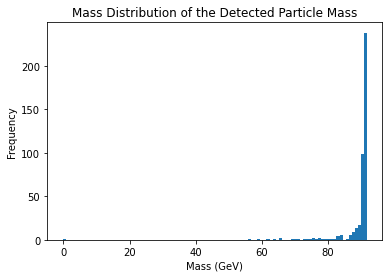

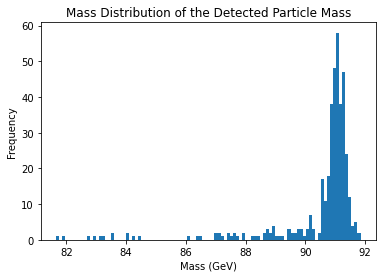

In [79]:
reconstructed_e = []
count = 0

# Loop over all momenta events
for i in range(1000):
    if len(pair_theta_values[i]) == 2: # Only accept values with exactly 2 pairs
        reconstructed_e.append(p[count]+p[count+1]) 
        count += 2 # Ensure we keep up with the position in the p array
    else:
        count += len(pair_theta_values[i]) # Ensure we keep up with the position in the p array
        
reconstructed_e = np.asarray(reconstructed_e) 

# Plot histogram of all values
plt.hist(reconstructed_e,bins=100)
plt.title("Mass Distribution of the Detected Particle Mass")
plt.xlabel("Mass (GeV)")
plt.ylabel("Frequency")
plt.show()
# Remove outliers
plt.hist(reconstructed_e[(reconstructed_e>80) & (reconstructed_e<100)],bins=100)
plt.title("Constrained Mass Distribution of the Detected Particle Mass")
plt.xlabel("Mass (GeV)")
plt.ylabel("Frequency")
plt.show()

Looking at these graphs, it appears the majority of data points lie within 90-92 GeV. As a result, the particle mass will be equal to the mean value within this range. On top of this, the width of the mass will be equal to the standard deviation of this range.

In [82]:
mass = np.mean(reconstructed_e[(reconstructed_e>90) & (reconstructed_e<92)])
width = np.std(reconstructed_e[(reconstructed_e>90) & (reconstructed_e<92)])
print("Mass of particle = {:.4f} GeV with partial decay width = {:.4f} GeV".format(mass,width))

Mass of particle = 91.0438 GeV with partial decay width = 0.3049 GeV


The mass of this particle lies very close to the mass of the Z boson, given by the PDG value of 91.1876 GeV. The partial decay width, $\Gamma_{\mu\mu}$, of this particle is significantly greater than the one given by the PDG value (0.09 GeV) but that is likely due to the approximations we made in our data analysis giving us a wider peak. On top of this, the Z-boson decay $Z\rightarrow\mu^++\mu^-$ is an allowed decay so the result makes perfect sense.